In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm

In [2]:
# import location data for cruise track and stations
cfname = '/Volumes/sclayton/kuroshio/AVHRR_9km/xbt_ctd_coords.mat'
coords = sio.loadmat(cfname)

botlat = coords['bot_lat']
botlon = coords['bot_lon']
xbtlon = coords['xbt_lon'].transpose()
xbtlat = coords['xbt_lat'].transpose()

# import the NOAA SST data
cfname = '/Volumes/sclayton/kuroshio/satellite/20091018-mcsstd.mat'
sst = sio.loadmat(cfname)
# create a masked array where missing data is set as "bad"
bad = (sst['sst']==5)
temp = np.ma.masked_where(bad, sst['sst'])


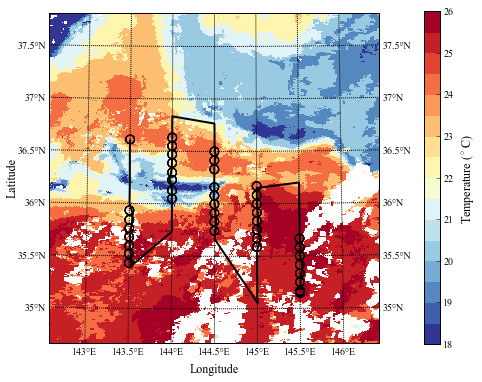

In [6]:
# make a plot of the data
from mpl_toolkits.axes_grid.inset_locator import inset_axes
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})


fig1 = plt.figure(1, figsize=(7, 7), dpi = 600)

m = Basemap(width=350000,height=350000,projection='lcc',
            resolution='c',lat_1=34.75,lat_2=37.75,lat_0=36.25,lon_0=144.5)

m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey',lake_color='white')

palette = plt.get_cmap('RdYlBu_r',16)
palette.set_bad('w',1.0)
im = m.pcolormesh(sst['loni'], sst['lati'], temp,shading = 'flat', cmap=palette, latlon=True, vmin= 18, vmax = 26)
x,y = m(botlon,botlat)
m.scatter(x,y,s=75,facecolors='none', edgecolors='k')
xx,xy = m(xbtlon,xbtlat)
m.plot(xx,xy, 'k',linewidth=2)

m.drawparallels(np.arange(30,50,0.5),labels=[1,1,0,1])
m.drawmeridians(np.arange(138,153,0.5),labels=[1,1,0,1])

cb = plt.colorbar(im, shrink=.69, pad = 0.1)
cb.set_label(label=r'Temperature ($^{\circ}$C)',fontsize=12)

plt.xlabel(r'Longitude', fontsize=12, labelpad=20)
plt.ylabel(r'Latitude', fontsize=12, labelpad=30)

plt.tick_params(axis='both', which='major', labelsize=12, pad = 20)

# add inset with larger scale map
#inset_axes = inset_axes(parent_axes,
#                       width="30%", # width = 30% of parent_bbox
#                      height=1., # height : 1 inch
#                       loc=3)
 

fig1.savefig('/Users/sclayton/Desktop/LO_fig1.tiff', format='tiff', dpi=600)